<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/pratique_python_regression_logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importer les données
import pandas as pd
diabete = pd.read_table('/content/sample_data/diabete.txt')
diabete.head()

,pregnant,plasma,diastolic,triceps,serum,bodymass,pedigree,age,alea1,alea2,diabete
0,0,138,0,0,0,36.3,0.933,25,0.338,0.188,positive
1,4,142,86,0,0,44.0,0.645,22,0.835,0.711,positive
2,3,142,80,15,0,32.4,0.200,63,0.493,0.845,negative
3,3,113,50,10,85,29.5,0.626,25,0.857,0.821,negative
4,5,88,78,30,0,27.6,0.258,37,0.045,0.392,negative


In [3]:
#recodage de ma variable cible
recodage = {'positive':1,'negative':0}
diabete['cible'] = diabete['diabete'].map(recodage)
diabete.head()

,pregnant,plasma,diastolic,triceps,serum,bodymass,pedigree,age,alea1,alea2,diabete,cible
0,0,138,0,0,0,36.3,0.933,25,0.338,0.188,positive,1
1,4,142,86,0,0,44.0,0.645,22,0.835,0.711,positive,1
2,3,142,80,15,0,32.4,0.200,63,0.493,0.845,negative,0
3,3,113,50,10,85,29.5,0.626,25,0.857,0.821,negative,0
4,5,88,78,30,0,27.6,0.258,37,0.045,0.392,negative,0


In [4]:
#transposer les chiffres avec 2 virgules pour mieux structurer le tableau
diabete.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
pregnant,568.0,3.78,3.34,0.00,1.00,3.00,6.00,15.00
plasma,568.0,120.28,32.34,0.00,99.00,115.00,140.25,198.00
diastolic,568.0,69.27,18.72,0.00,64.00,72.00,80.00,122.00
triceps,568.0,20.90,15.94,0.00,0.00,23.00,33.00,99.00
serum,568.0,81.96,119.80,0.00,0.00,39.00,125.25,846.00
bodymass,568.0,31.88,7.68,0.00,27.18,31.75,36.50,55.00
pedigree,568.0,0.46,0.32,0.08,0.24,0.37,0.61,2.33
age,568.0,33.23,11.82,21.00,24.00,29.00,40.00,81.00
alea1,568.0,0.50,0.29,0.01,0.24,0.48,0.74,1.00
alea2,568.0,0.51,0.28,0.00,0.28,0.51,0.74,1.00


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

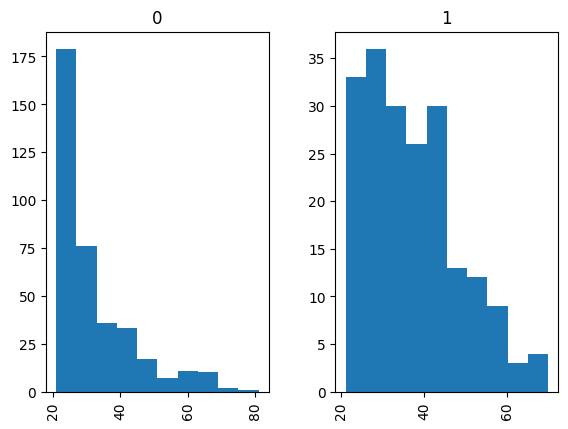

In [6]:
diabete.hist(column='age',by='cible')

<Axes: title={'center': 'age'}, xlabel='cible'>

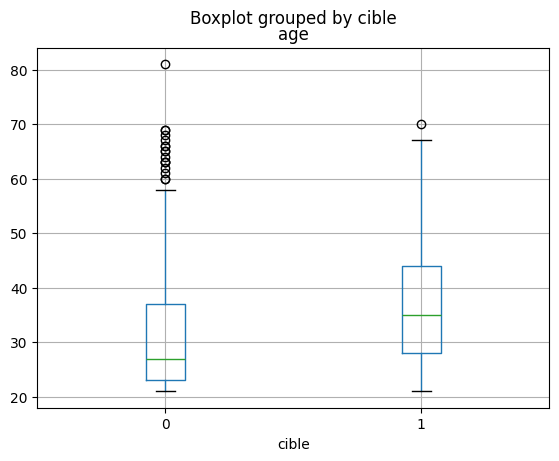

In [7]:
diabete.boxplot(column='age',by='cible')

<Axes: title={'center': 'bodymass'}, xlabel='cible'>

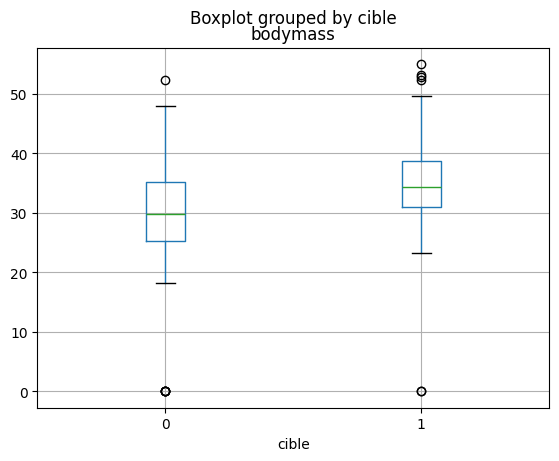

In [8]:
diabete.boxplot(column='bodymass',by='cible')

<Axes: title={'center': 'alea1'}, xlabel='cible'>

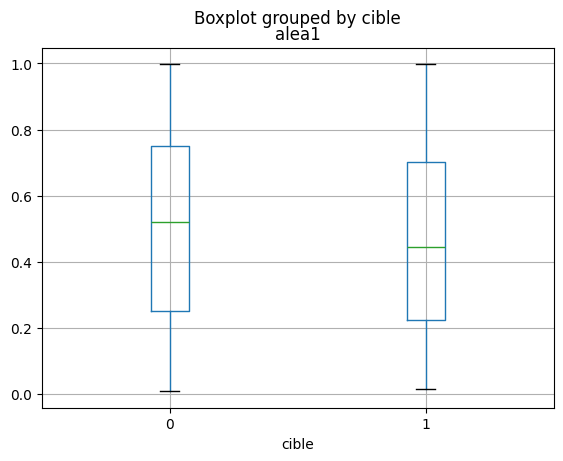

In [9]:
diabete.boxplot(column='alea1',by='cible')

In [12]:
#je selection les variabls_explicatives et la variable cible
explicative1=diabete[['age','bodymass','plasma','pedigree']]
cible=diabete['cible']

#importer la bibliotheque pour l'estimation de la regression logistique
import statsmodels as sm
from statsmodels.api import Logit


In [13]:
#estimer notre regression logistique
lr1=Logit(cible,explicative1)
resultat=lr1.fit()

Optimization terminated successfully.
         Current function value: 0.654870
         Iterations 4


In [14]:
print(resultat.summary())

                           Logit Regression Results                           
Dep. Variable:                  cible   No. Observations:                  568
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Jan 2025   Pseudo R-squ.:                -0.01634
Time:                        19:30:46   Log-Likelihood:                -371.97
converged:                       True   LL-Null:                       -365.99
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0123      0.007     -1.700      0.089      -0.026       0.002
bodymass      -0.0349      0.009     -3.686      0.000      -0.053      -0.016
plasma         0.0092      0.003      3.343      0.0

In [18]:
#j'ajoute le score à partir de la fonction cdf
scores = lr1.cdf(resultat.fittedvalues)
print(scores)

[0.40300363 0.36329157 0.35031521 0.41178285 0.34690539 0.37364701
 0.46261273 0.24366129 0.24275242 0.46117103 0.42162046 0.6243357
 0.27662577 0.4138854  0.3940262  0.36735353 0.36943411 0.2903181
 0.39503379 0.3035246  0.42958383 0.43302671 0.55630092 0.38106952
 0.41480647 0.40751703 0.42544665 0.43953076 0.54284792 0.36374635
 0.44483694 0.42771975 0.65151206 0.42986413 0.42654833 0.36249417
 0.35612741 0.25126175 0.49259077 0.32587004 0.34450028 0.3558609
 0.3297119  0.4604235  0.33367215 0.28002066 0.30423459 0.36071435
 0.28688752 0.42373363 0.30932482 0.35950137 0.45932476 0.35745851
 0.37237375 0.3597925  0.3862621  0.44947131 0.32341677 0.38734165
 0.42773981 0.30076892 0.46667424 0.43613174 0.37532915 0.47242949
 0.50652019 0.32205775 0.40157958 0.42577032 0.41220979 0.49656173
 0.24145828 0.43530512 0.38548745 0.29759833 0.38910919 0.43647359
 0.44031359 0.45665036 0.35998211 0.40538302 0.39873805 0.4510743
 0.36261284 0.30277315 0.44912706 0.61903608 0.34276593 0.3340879


In [19]:
#j'ajoute le score à ma données initiale
diag_fiab=pd.DataFrame({'score':scores,'cible':cible})
diag_fiab.head()

,score,cible
0,0.403004,1
1,0.363292,1
2,0.350315,0
3,0.411783,0
4,0.346905,0


<Axes: title={'center': 'score'}, xlabel='cible'>

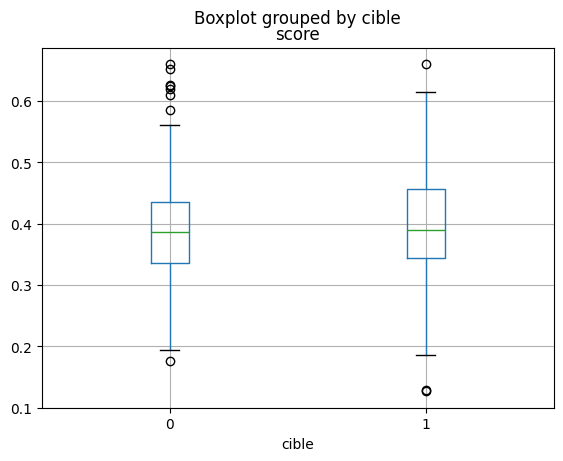

In [20]:
diag_fiab.boxplot(column='score',by='cible')

In [21]:
#calcul le AUC (Aire de Courbe)
from sklearn.metrics import roc_auc_score
roc_auc_score(diag_fiab['cible'],diag_fiab['score'])

0.5327243800746104